# Geometric Tensor Learning
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

from util.t2m import t2m
from util.update_L import update_L
from util.update_X import update_X

In [2]:
sizes = (10, 15, 12, 16)
n = len(sizes)

In [3]:
X = np.random.standard_normal(size=sizes) # WGN to generate a stationary signal.

In [4]:
G = [nx.erdos_renyi_graph(sizes[i],0.3) for i in range(n)] # List of graphs for each mode
Phi = [nx.laplacian_matrix(G[i]).todense() for i in range(n)]


In [5]:
# Generate data smooth in Cartesian graph G.
ranks = (5, 5, 5, 5)
W_all = 1
V_all = 1

for i in range(n):
    W, V = np.linalg.eigh(nx.laplacian_matrix(G[i]).todense())
    temp_eig = np.flip(np.sort(abs(np.random.randn(ranks[i]))))
    W_all = np.kron(W_all, np.ones(ranks[i])) + np.kron(np.ones(ranks[:i]).flatten(), temp_eig)
    V_all = np.kron(V_all, V[:,:ranks[i]])

X_smooth = np.tensordot(V_all, W_all, axes=([1],[0])).reshape(sizes)
del W_all, V_all

In [6]:
noise_ratio = 0.01
missing_ratio = 0.2
norm_X = np.sqrt(np.sum(X_smooth**2))
Y = X_smooth + noise_ratio * np.sqrt(norm_X) * np.random.standard_normal(sizes)
mask = np.random.uniform(size=np.prod(sizes))-missing_ratio<0
Y.ravel()[mask] = 0

In [7]:
# Parameters
alpha = [[1 for i in range(n)], 
    [1 for i in range(n)], 
    [1 for i in range(n)]]
theta = [1 for i in range(n)]
gamma = [1 for i in range(n)]

# Initializations
L = np.zeros_like(Y)
G_var = [np.zeros_like(Y) for i in range(n)]
X = [np.zeros_like(Y) for i in range(n)]
Lx = [np.zeros_like(Y) for i in range(n)]
Lambda = [[np.zeros_like(Y) for i in range(n)],
    [np.zeros_like(Y) for i in range(n)],
    [np.zeros_like(Y) for i in range(n)]]

In [8]:
G_inv = [np.linalg.inv(gamma[i]*Phi[i] + alpha[0][i]*np.eye(sizes[i])) for i in range(n)]
while True:
    temp = np.zeros_like(Y)
    for i in range(n):
        temp += alpha[1][i]*(G_var[i] + Lambda[0][i])
        temp += alpha[2][i]*(Lx[i] + Lambda[1][i])
    L = (Y + temp)/(sum(alpha[0]) + sum(alpha[1]) + 1)

    G = [alpha[0][i]*G_inv[i]*t2m(L-Lambda[0][i], i) for i in range(n)]

    Lx, fvals_L = update_L(Lx, L, X, Lambda[1:], Phi, alpha[1:], theta, track_fval=True)
    X, fvals_X = update_X(X, Lx, Lambda[2], Phi, alpha[2], theta, track_fval=True)
    break

C:\Users\emres\anaconda3\lib\site-packages\matplotlib_inline\backend_inline.py:234: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


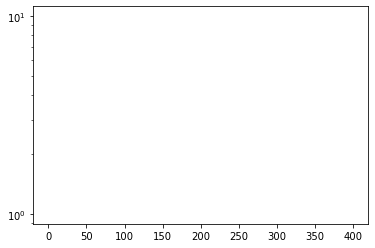

In [14]:
plt.semilogy(np.abs(fvals_L))

In [15]:
fvals_L

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0